In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from config import paths
from notebooks.eda.eda_visualization import quick_dist_box, nan_report_simple

# 01 EDA - Apartment

Objetivo: explorar apenas apartamentos, documentar informações em falta, definir limites,
limpar outliers e preparar um dataset limpo para modelação.


## Setup e leitura


In [ ]:
df_apartment = pd.read_parquet(paths.RAW_LISTINGS_FILE_APARTMENT)
df_apartment

,Price,District,City,Town,Type,EnergyCertificate,GrossArea,TotalArea,Parking,HasParking,...,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
index,,,,,,,,,,,,,,,,,,,,,
1,223000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,81.0,1.0,1.0,...,1.0,NaN,2.0,NaN,NaN,None,81.0,NaN,NaN,2.0
2,228000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,108.0,1.0,1.0,...,1.0,NaN,2.0,NaN,NaN,None,108.0,NaN,NaN,2.0
3,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,1.0,...,1.0,NaN,2.0,NaN,NaN,None,114.0,NaN,NaN,0.0
4,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,114.0,1.0,1.0,...,1.0,NaN,2.0,NaN,NaN,None,114.0,NaN,NaN,2.0
5,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,NaN,115.0,1.0,1.0,...,1.0,NaN,2.0,NaN,NaN,None,115.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126603,155000.0,Viana do Castelo,Arcos de Valdevez,Paçô,Apartment,E,NaN,87.0,1.0,NaN,...,0.0,0.0,NaN,2.0,0.0,None,87.0,NaN,NaN,1.0
126604,165500.0,Setúbal,Setúbal,São Sebastião,Apartment,D,NaN,90.0,0.0,NaN,...,0.0,0.0,2.0,2.0,0.0,Used,81.0,0.0,120.4,1.0
126607,190000.0,Setúbal,Almada,Laranjeiro e Feijó,Apartment,NC,NaN,83.0,0.0,NaN,...,0.0,0.0,6.0,3.0,0.0,Good condition,75.0,270.0,83.0,1.0


In [ ]:
nan_apartment = nan_report_simple(df_apartment)
nan_apartment

,quantidade_nan,percentagem_nan
LotSize,39598,90.00
ConservationStatus,35317,80.27
BuiltArea,33986,77.24
GrossArea,33435,75.99
PublishDate,32081,72.91
NumberOfWC,26042,59.19
ElectricCarsCharging,22045,50.10
EnergyEfficiencyLevel,22045,50.10
Garage,22045,50.10
NumberOfBedrooms,22045,50.10


### Análise de Valores em Falta - Tipo de Imovel: Apartment

Apos a segmentação do dataset por tipo de imóvel, foi analisada a percentagem de valores em falta especificamente para anúncios de **apartamentos**.

Os resultados mostram padrões claros, mas importa salientar que a **percentagem de valores em falta não e utilizada como critério absoluto de exclusão**.  
A decisão de manter ou excluir variáveis considera também o seu **significado semântico**, **redundância** e a capacidade dos futuros modelos escolhidos em lidar nativamente com valores em falta (NaN).

#### Variáveis com elevada percentagem de valores em falta e/ou relevância semântica limitada
- `LotSize` (90.00%)
- `ConservationStatus` (80.27%)
- `BuiltArea` (77.24%)
- `GrossArea` (75.99%)
- `PublishDate` (72.91%)
- `NumberOfWC` (59.19%)
- `ElectricCarsCharging`, `EnergyEfficiencyLevel`, `Garage` (~50%)

Estas variáveis são maioritariamente irrelevantes, opcionais ou inconsistentes para apartamentos:
- `LotSize` não é aplicável a este tipo de imóvel.
- `BuiltArea` e `GrossArea` apresentam elevada inconsistência e redundância face a `LivingArea`.
- `NumberOfWC` mostrou-se semanticamente ambígua e redundante face a `NumberOfBathrooms`.
- Campos como `ConservationStatus`, `EnergyEfficiencyLevel` e `ElectricCarsCharging` não são obrigatórios nos anúncios e apresentam padrões de preenchimento pouco consistentes.
- `PublishDate` não apresenta histórico suficiente para uma análise temporal fiável.

#### Variáveis com percentagem de valores em falta moderada e elevado significado semântico
- `NumberOfBedrooms` (50.10%)
- `Floor` (49.95%)
- `HasParking` (49.90%)
- `TotalRooms` (24.41%)
- `ConstructionYear` (20.59%)

Apesar do missing significativo, estas variáveis possuem relevância clara para a caracterização de apartamentos.  
No entanto:
- `HasParking` foi excluída por ser redundante face a `Parking`.
- `TotalRooms` nao foi utilizada para imputação automática por não ser semanticamente equivalente a `NumberOfBedrooms`.
- `Floor` foi adiado para versões futuras devido a elevada variabilidade de representação.
- `ConstructionYear` foi mantida e transformada em idade do imóvel.

#### Variáveis com elevada cobertura e qualidade adequada
- `Price`
- `LivingArea`
- `TotalArea`
- `NumberOfBathrooms`
- `Parking`
- `Elevator`
- `EnergyCertificate`
- `District`, `City`, `Town`

Estas colunas apresentam elevada cobertura e significado semântico claro, constituindo a base do conjunto de fatures para o modelo inicial.

#### Conclusão
A analise confirma que a presença de valores em falta e fortemente influenciada pelo tipo de imóvel e pelas praticas de preenchimento dos anúncios.  
Variáveis com percentagens elevadas de missing podem conter informação relevante, desde que o padrão de ausência seja informativo e o modelo consiga lidar com valores em falta.

Para o modelo inicial de previsão de preços de apartamentos, foram selecionadas apenas variáveis com significado claro e qualidade adequada, evitando imputações artificiais e privilegiando robustez e interoperabilidade.

Esta abordagem segmentada garante maior coerência dos dados e melhores resultados de modelagem.


## Distribuicoes e estatisticas


Price | dtype=float64 | missing=0.31% | unique=2901


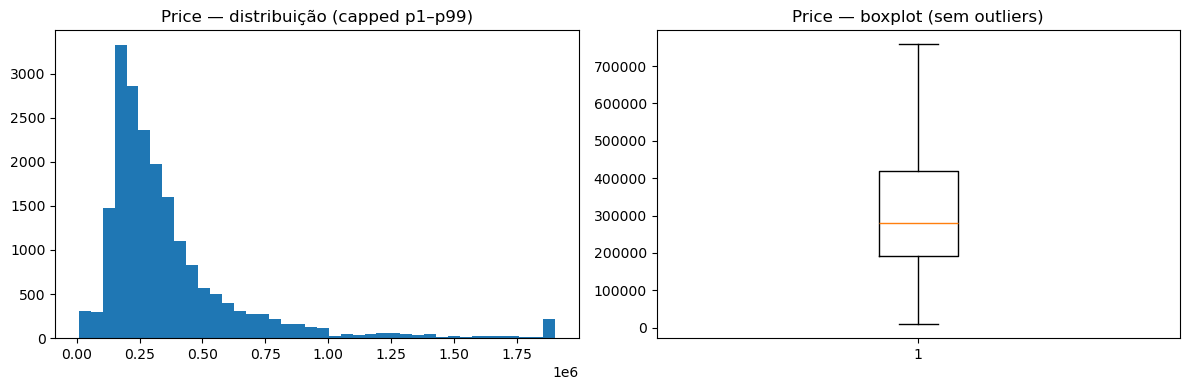

District | dtype=object | missing=0.00% | unique=20


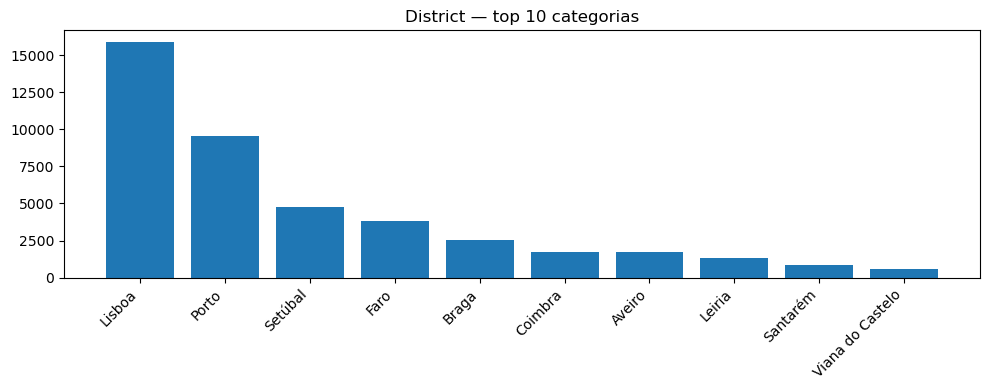

City | dtype=object | missing=0.00% | unique=215


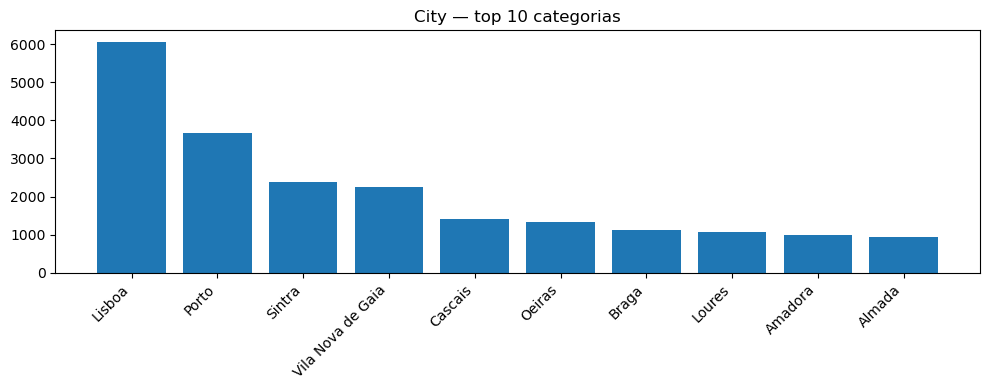

Town | dtype=object | missing=0.00% | unique=791


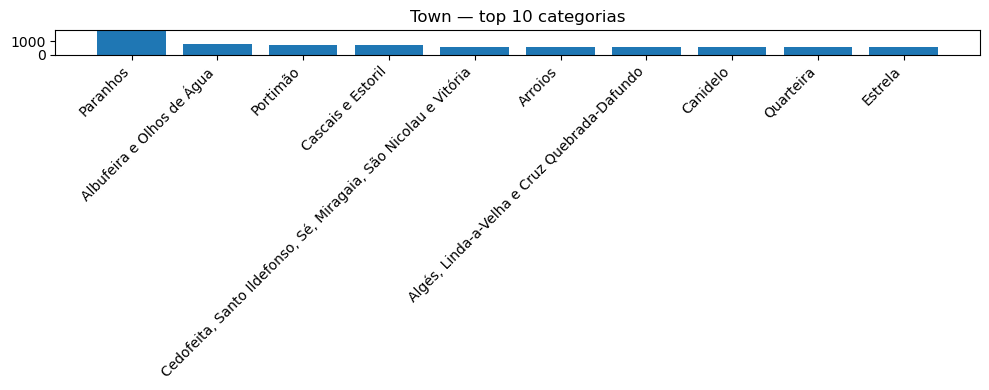

Type | dtype=object | missing=0.00% | unique=1


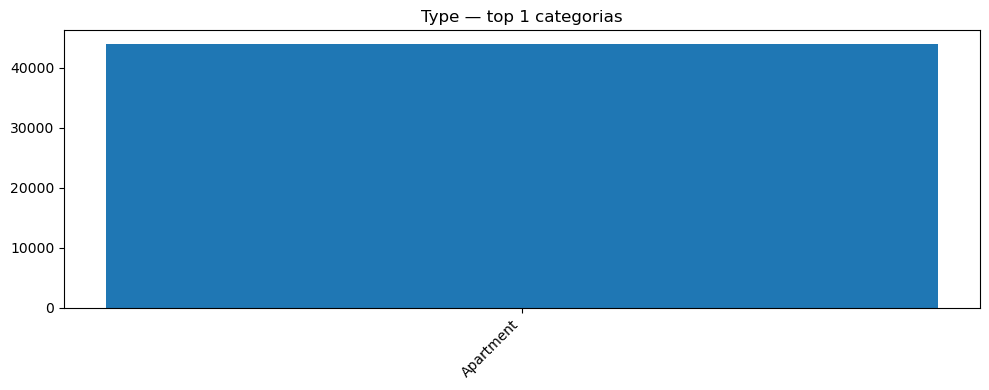

EnergyCertificate | dtype=object | missing=0.00% | unique=12


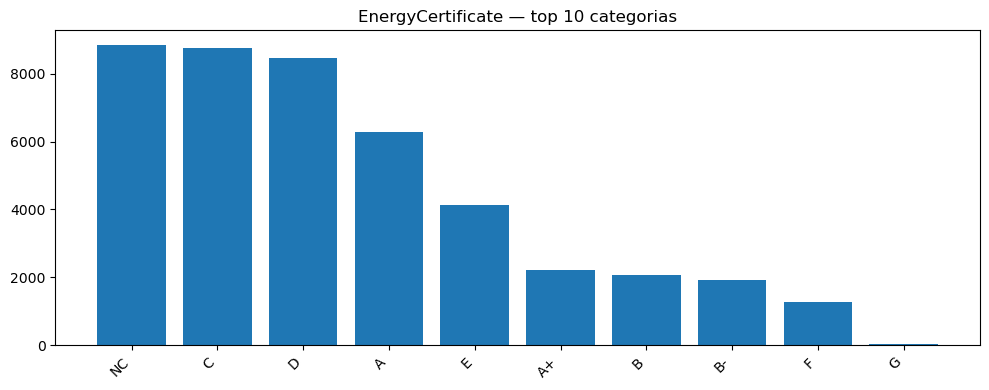

GrossArea | dtype=float64 | missing=75.99% | unique=451


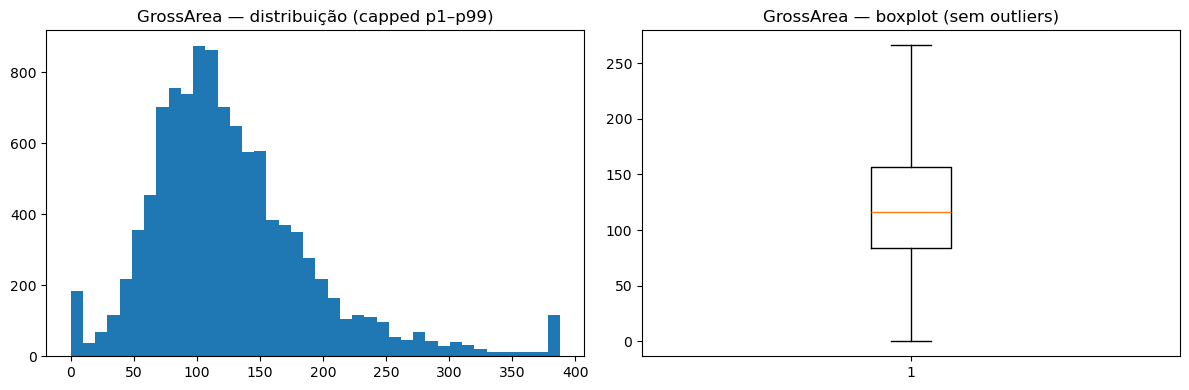

TotalArea | dtype=float64 | missing=0.01% | unique=884


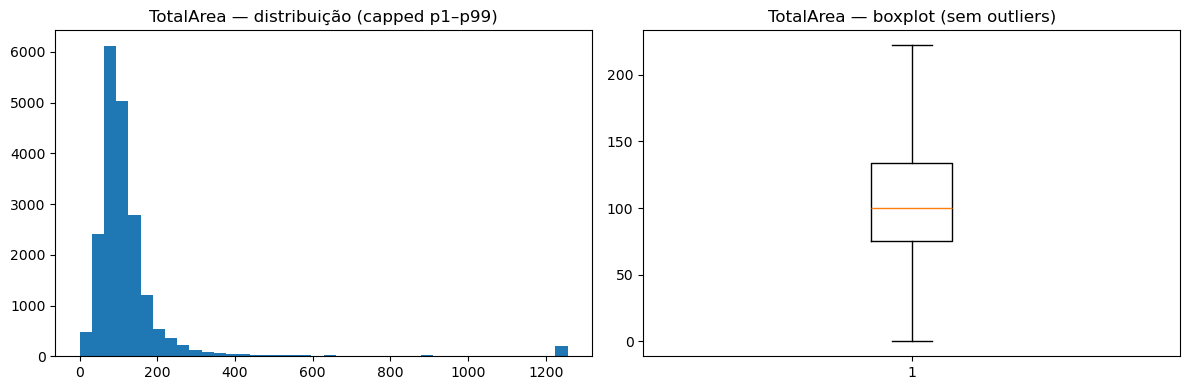

Parking | dtype=float64 | missing=0.04% | unique=4


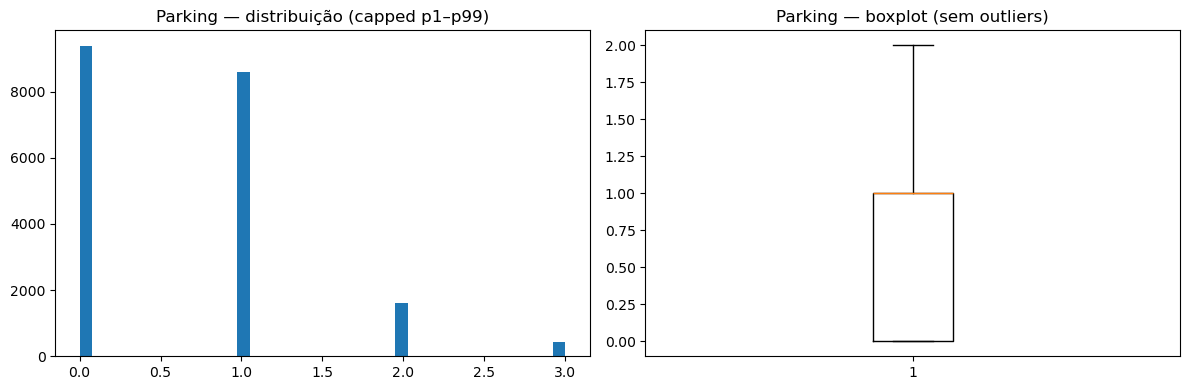

HasParking | dtype=float64 | missing=49.90% | unique=2


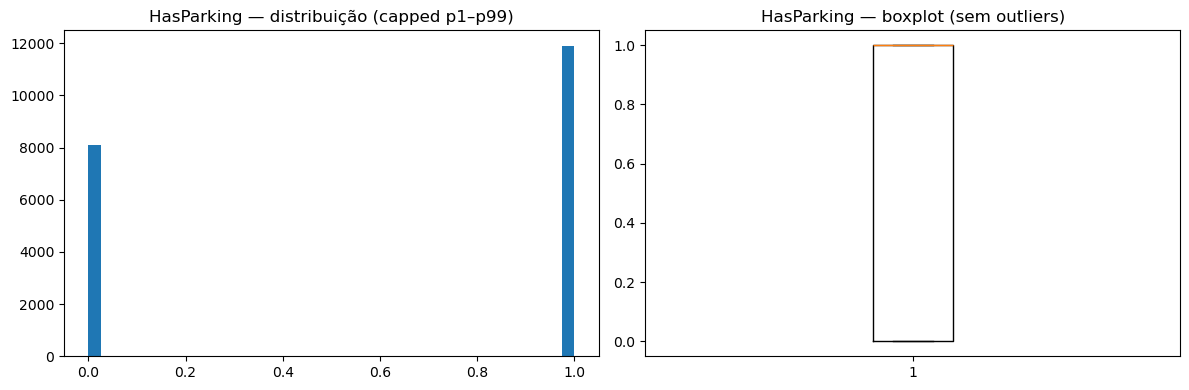

Floor | dtype=object | missing=49.95% | unique=19


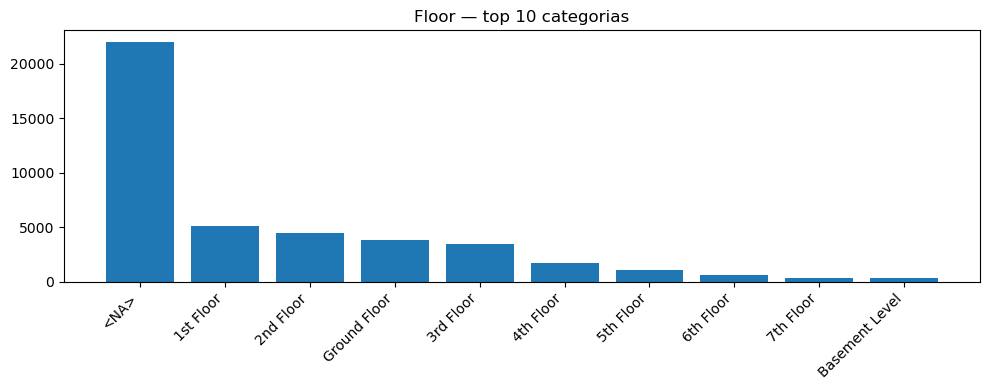

ConstructionYear | dtype=float64 | missing=20.59% | unique=118


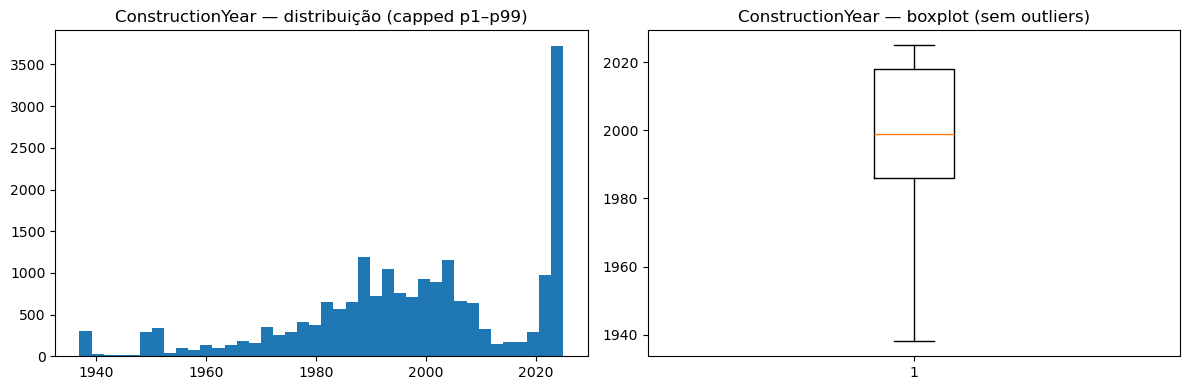

EnergyEfficiencyLevel | dtype=object | missing=50.10% | unique=11


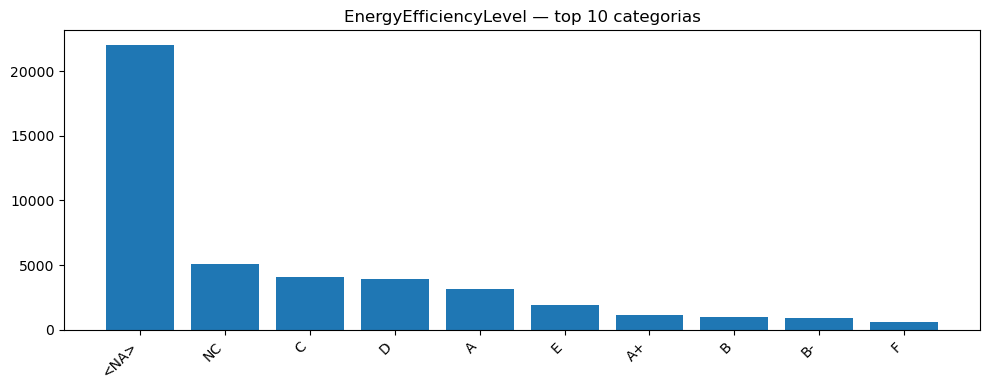

PublishDate | dtype=object | missing=72.91% | unique=11893


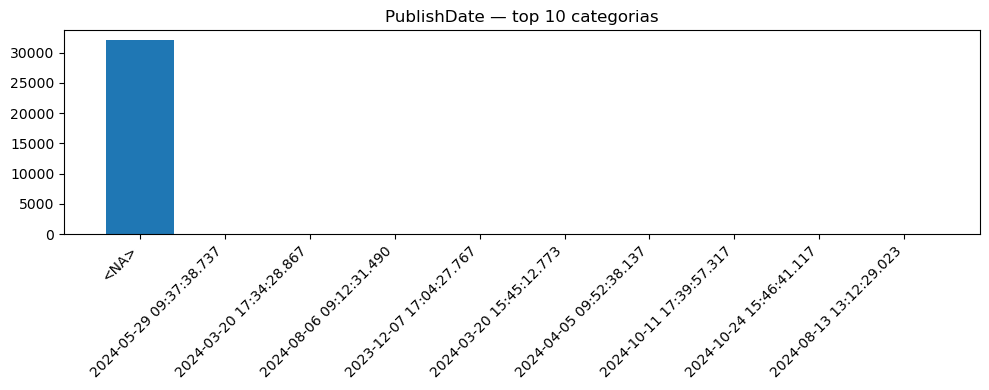

Garage | dtype=float64 | missing=50.10% | unique=2


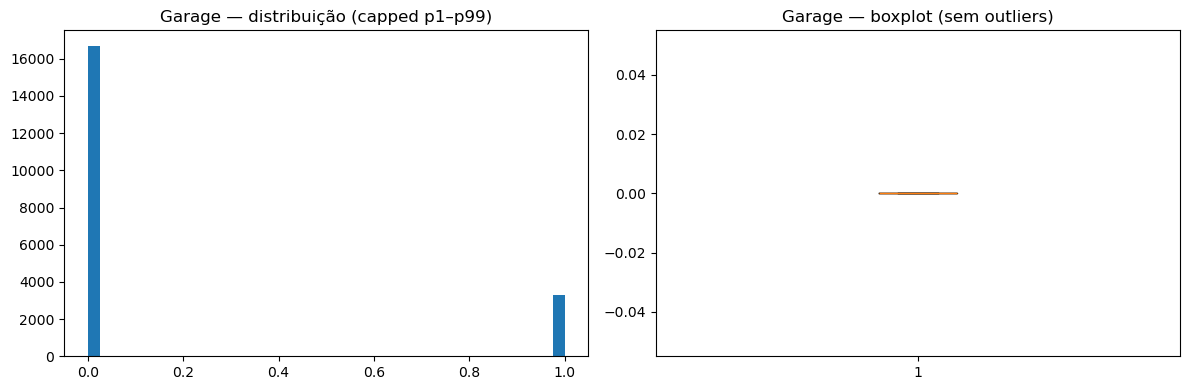

Elevator | dtype=float64 | missing=0.01% | unique=2


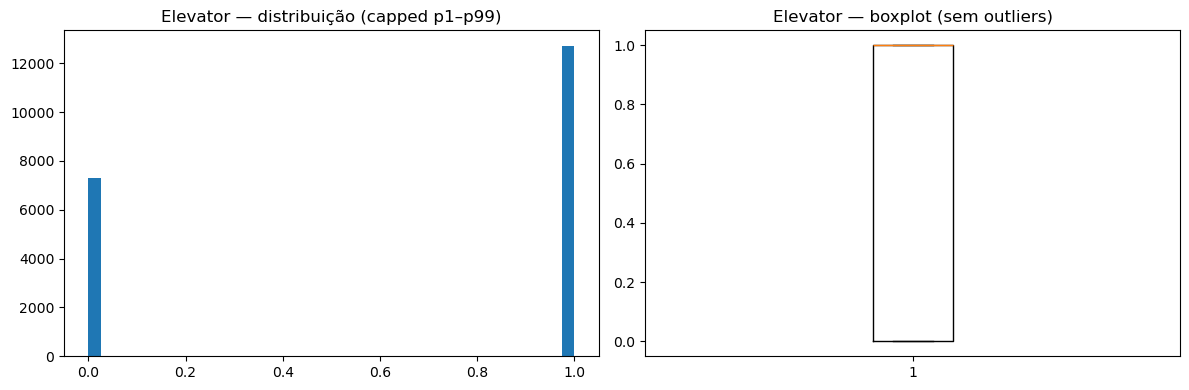

ElectricCarsCharging | dtype=float64 | missing=50.10% | unique=2


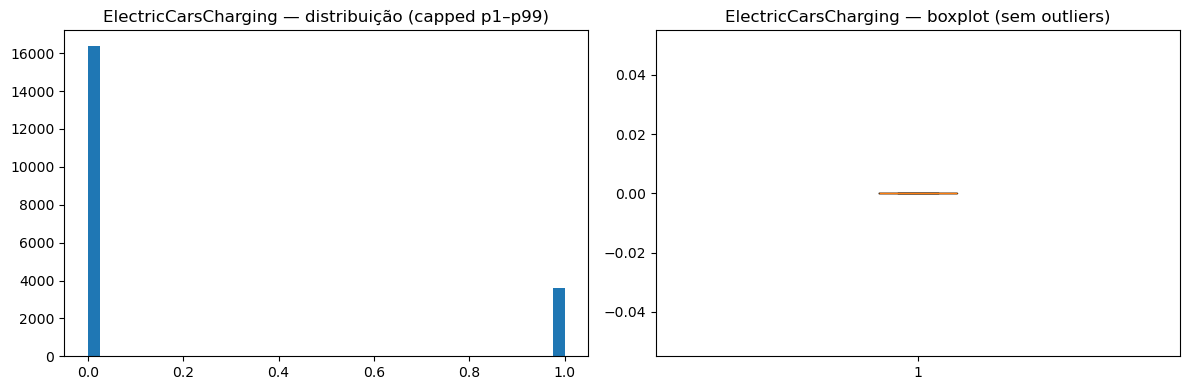

TotalRooms | dtype=float64 | missing=24.41% | unique=16


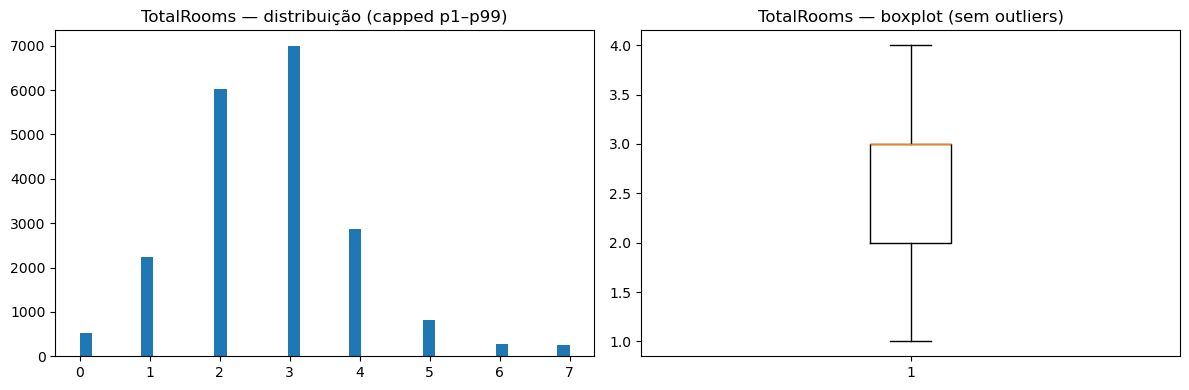

NumberOfBedrooms | dtype=float64 | missing=50.10% | unique=13


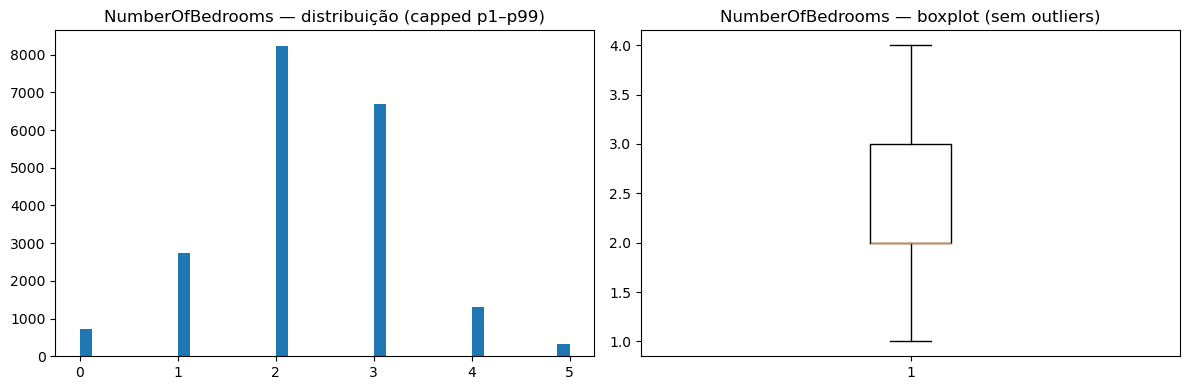

NumberOfWC | dtype=float64 | missing=59.19% | unique=10


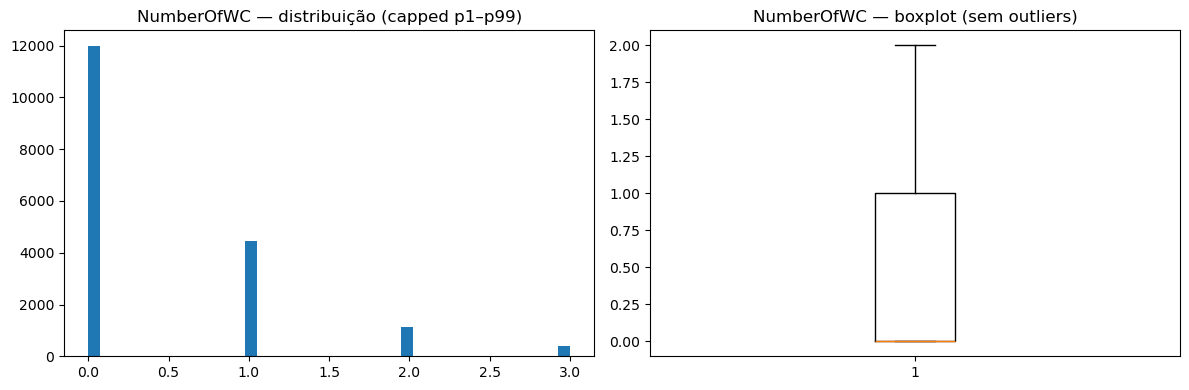

ConservationStatus | dtype=object | missing=80.27% | unique=6


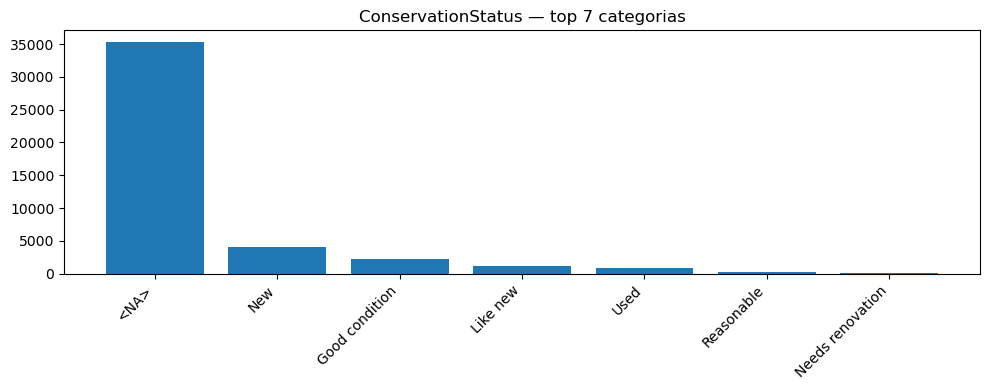

LivingArea | dtype=float64 | missing=0.01% | unique=400


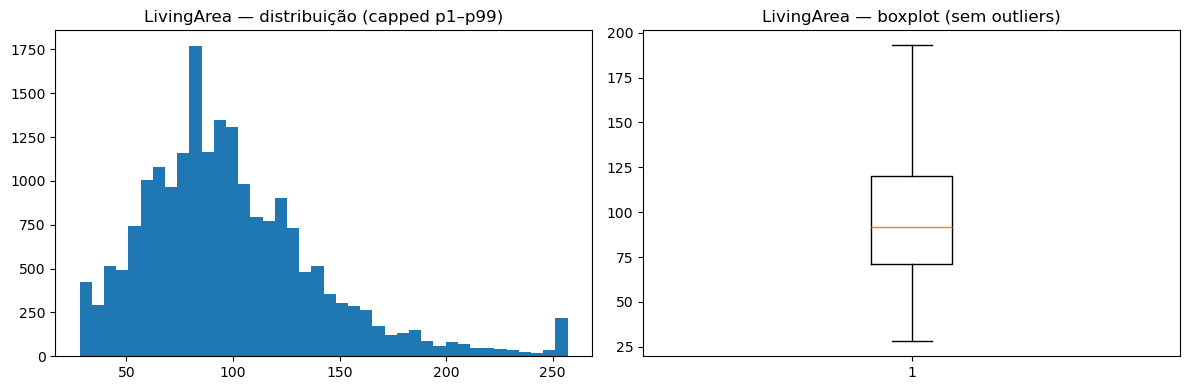

LotSize | dtype=float64 | missing=90.00% | unique=758


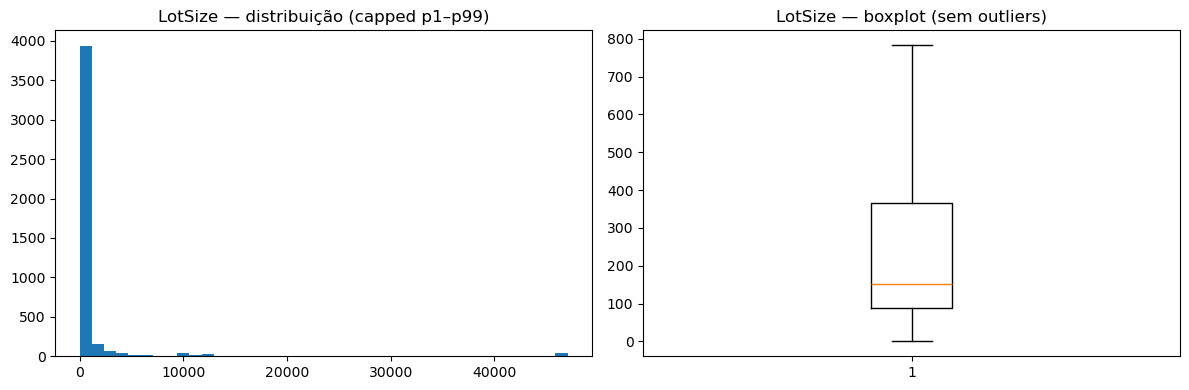

BuiltArea | dtype=float64 | missing=77.24% | unique=3515


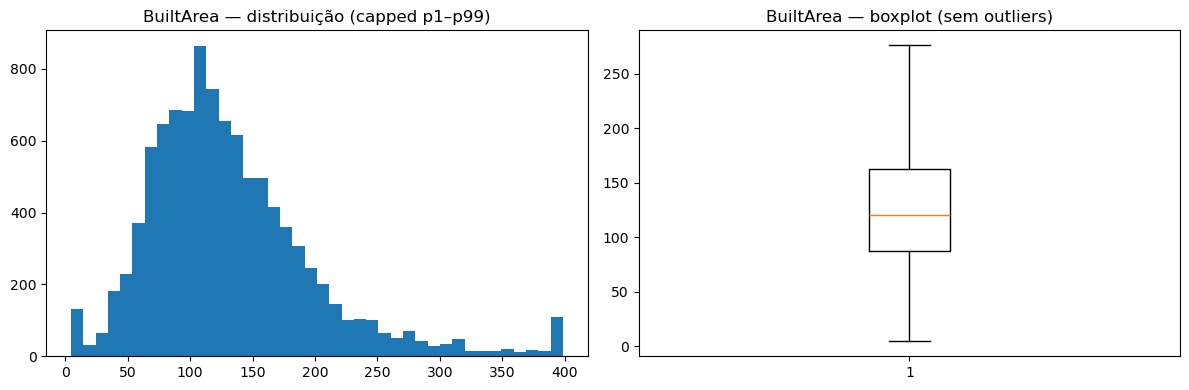

NumberOfBathrooms | dtype=float64 | missing=0.26% | unique=17


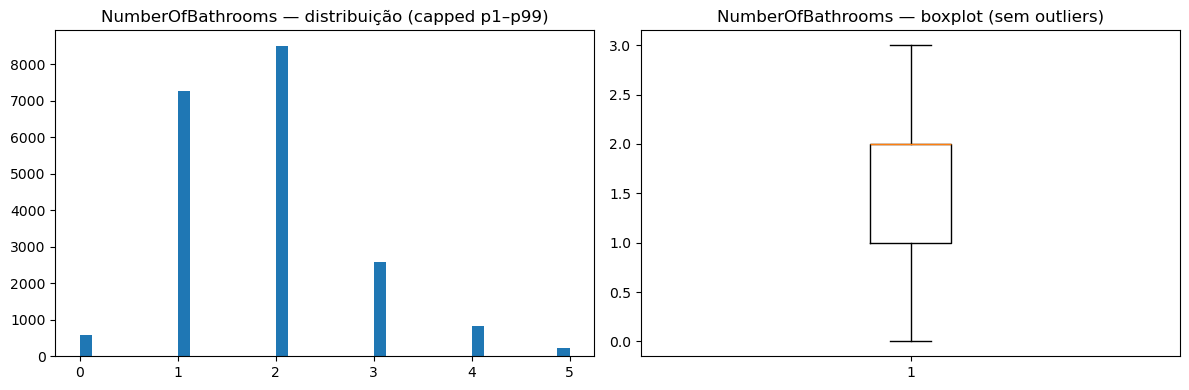

In [36]:
quick_dist_box(df_apartment, features=df_apartment.columns)


## Selecao de features e transformacoes


In [38]:
df_apartment.describe()


,Price,LivingArea,TotalArea,NumberOfBathrooms,Parking,ConstructionYear,PropertyAge
count,4.386100e+04,43995.000000,4.399600e+04,43883.000000,43980.000000,34941.000000,34941.000000
mean,3.731801e+05,131.853779,4.526948e+03,1.822505,0.652615,1997.413440,28.586560
std,3.467142e+05,1923.882504,4.461368e+05,0.993925,0.715564,21.415458,21.415458
min,6.000000e+02,0.000000,-2.710000e+02,-13.000000,0.000000,1900.000000,1.000000
25%,1.910000e+05,71.000000,7.600000e+01,1.000000,0.000000,1986.000000,7.000000
50%,2.790000e+05,92.000000,1.000000e+02,2.000000,1.000000,1999.000000,27.000000
75%,4.175000e+05,120.000000,1.350000e+02,2.000000,1.000000,2019.000000,40.000000
max,7.800000e+06,220000.000000,5.621510e+07,62.000000,3.000000,2025.000000,126.000000


### Definicao de Limites para Variaveis Numericas (Apartamentos)

A analise estatistica descritiva revelou a presenca de valores numericos invalidos ou implausiveis, resultantes de erros de preenchimento, normalizacao ou scraping das fontes.

Com base na distribuicao observada (`min`, `quartis`, `max`) e em criterios de plausibilidade para o mercado imobiliario, foram definidos limites conservadores para as principais variaveis numericas.

#### Limites adotados

- **Price**
  - Valores inferiores a 20 000EUR foram considerados invalidos.
  - Justificacao: precos abaixo deste limiar nao sao plausiveis para apartamentos e indicam erros de input.

- **LivingArea**
  - Valores <= 0 m2 ou superiores a 500 m2 foram considerados invalidos.
  - Justificacao: areas nulas ou extremamente elevadas nao sao compativeis com tipologias residenciais padrao.

- **TotalArea**
  - Valores <= 0 m2 ou superiores a 1 000 m2 foram considerados invalidos.
  - Justificacao: presenca de areas negativas e valores excessivos (ordem de milhoes) indica erros de normalizacao.

- **NumberOfBathrooms**
  - Valores <= 0 ou superiores a 10 foram considerados invalidos.
  - Justificacao: valores negativos e numeros excessivos nao sao plausiveis para apartamentos.

- **ConstructionYear / PropertyAge**
  - Anos de construcao fora do intervalo [1850, ano atual] e idades superiores a 150 anos foram considerados invalidos.
  - Justificacao: garante coerencia temporal e evita valores extremos resultantes de parsing incorreto.

#### Nota metodologica
Os valores fora destes intervalos foram tratados como ausentes (NaN), evitando imputacoes artificiais.  
Esta abordagem preserva a integridade dos dados e permite que modelos capazes de lidar com valores em falta aprendam padroes informativos associados a ausencia de informacao.


Price
Regra: [20000, 10000000]
Nao-NaN: 43861 | invalidos: 632 (1.44%)


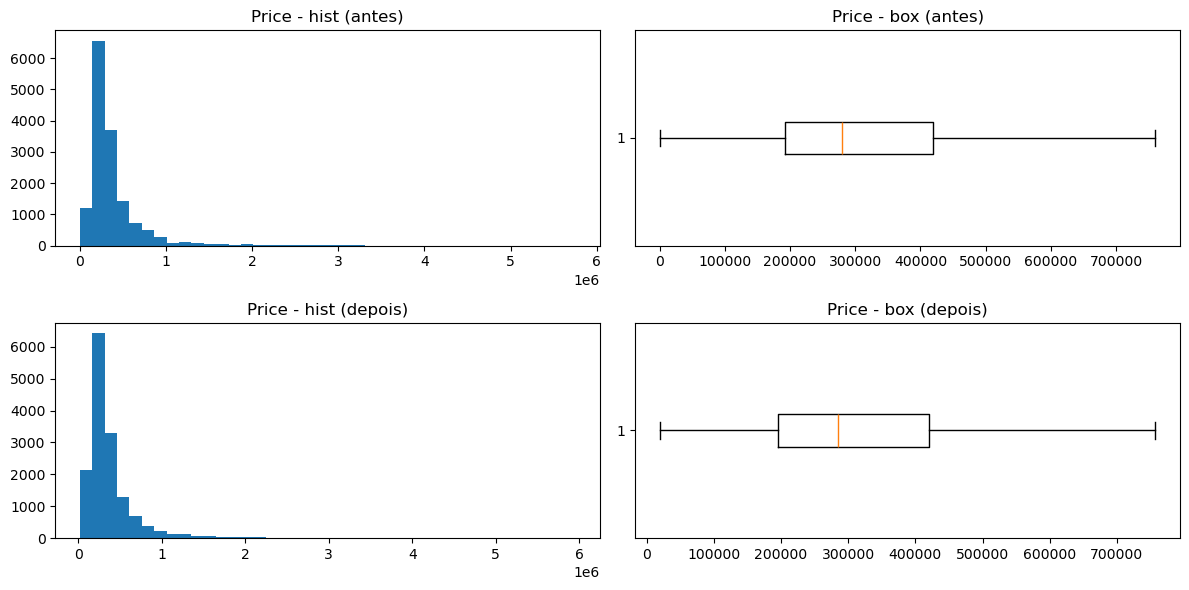

LivingArea
Regra: [1, 500]
Nao-NaN: 43995 | invalidos: 112 (0.25%)


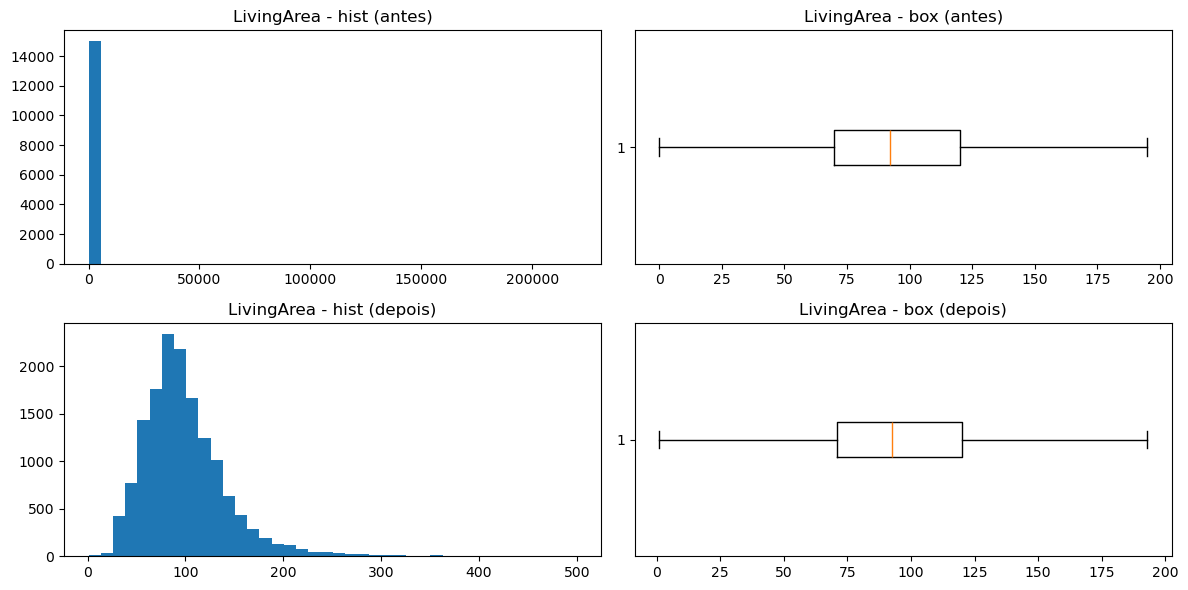

TotalArea
Regra: [1, 1000]
Nao-NaN: 43996 | invalidos: 1091 (2.48%)


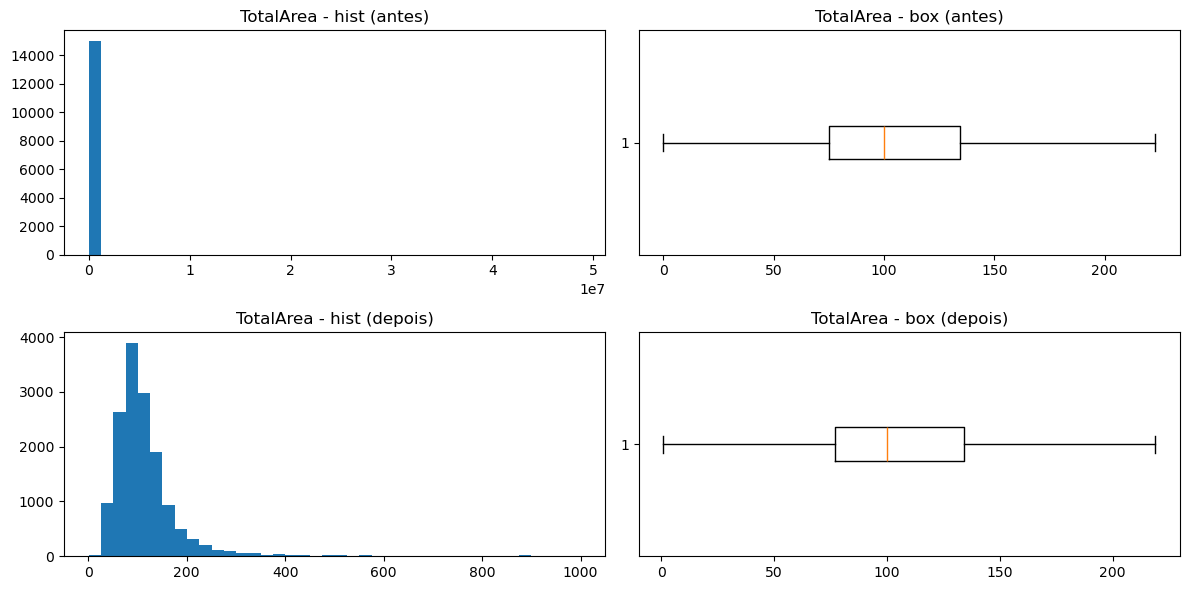

NumberOfBathrooms
Regra: [1, 10]
Nao-NaN: 43883 | invalidos: 1232 (2.81%)


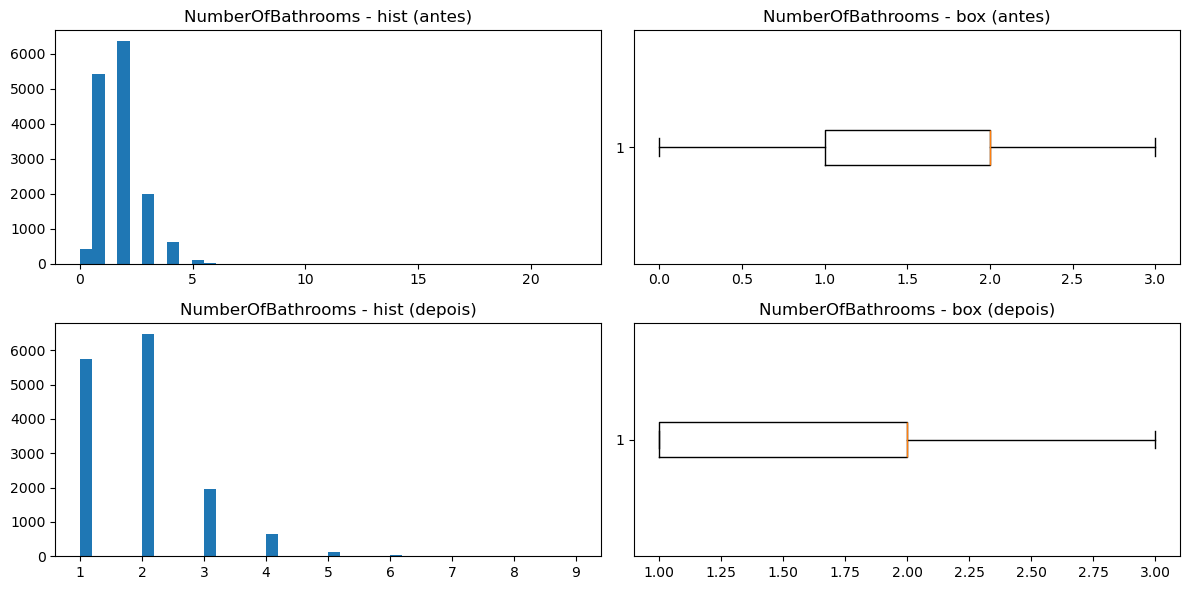

ConstructionYear
Regra: [1850, 2026]
Nao-NaN: 34941 | invalidos: 0 (0.00%)


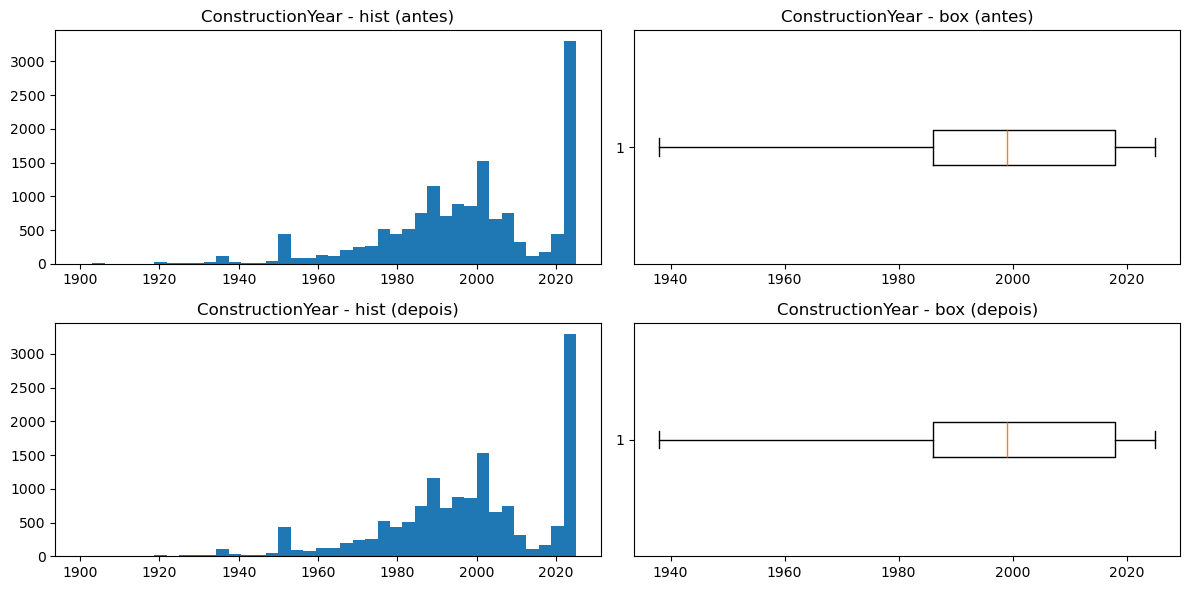

PropertyAge
Regra: [0, 150]
Nao-NaN: 34941 | invalidos: 0 (0.00%)


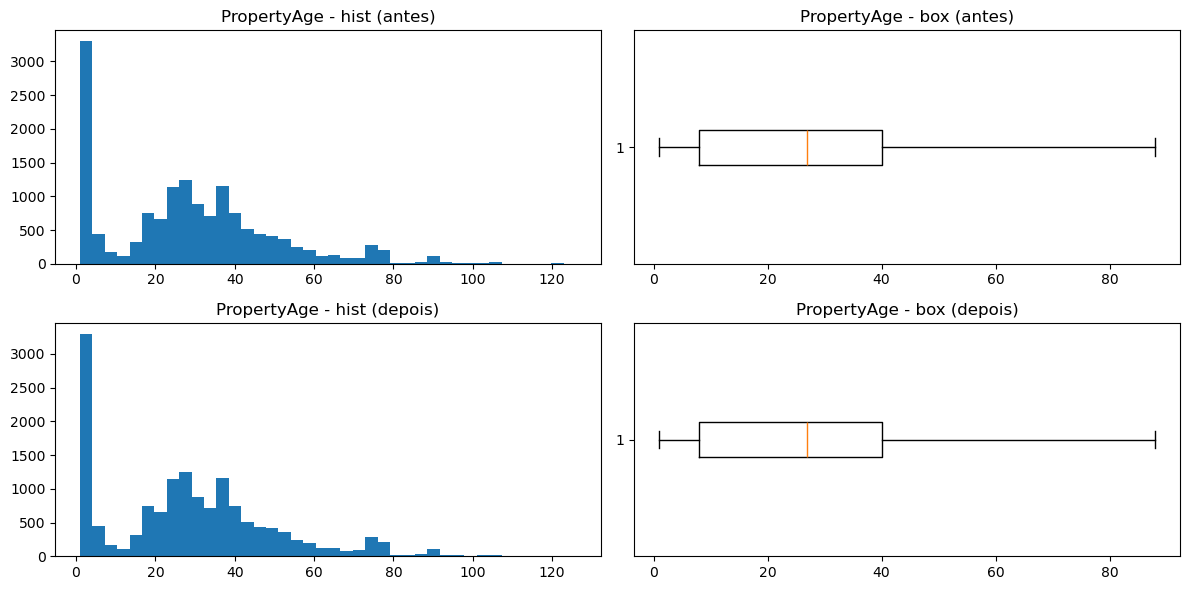

In [ ]:
# Regras simples (ajusta se quiseres)
RULES = {
    'Price': {'min': 20000, 'max': 10_000_000},          # apartamentos
    'LivingArea': {'min': 1, 'max': 500},
    'TotalArea': {'min': 1, 'max': 1000},
    'NumberOfBathrooms': {'min': 1, 'max': 10},
    'ConstructionYear': {'min': 1850, 'max': 2026},      # opcional
    'PropertyAge': {'min': 0, 'max': 150},               # opcional
}

def clean_numeric_with_plots(
    df: pd.DataFrame,
    rules: dict,
    sample_n: int = 20000,
    bins: int = 40,
    show_box: bool = True,
    random_state: int = 42,
):
    """
    Para cada variavel em rules:
    - conta invalidos (fora de [min, max])
    - converte invalidos em NaN
    - plot hist + boxplot antes vs depois da limpeza
    """
    df_clean = df.copy()

    for col, r in rules.items():
        if col not in df_clean.columns:
            continue

        s = df_clean[col]
        if not (pd.api.types.is_numeric_dtype(s) and not pd.api.types.is_bool_dtype(s)):
            continue

        s_full = s.dropna()
        if len(s_full) == 0:
            print('=' * 80)
            print(f'{col}: sem valores (tudo NaN)')
            continue

        col_min = r.get('min', -np.inf)
        col_max = r.get('max', np.inf)

        invalid_mask = (df_clean[col] < col_min) | (df_clean[col] > col_max)
        invalid_count = int(invalid_mask.sum())
        total_count = int(df_clean[col].notna().sum())
        invalid_pct = (invalid_count / max(total_count, 1)) * 100

        print('=' * 80)
        print(f'{col}')
        print(f'Regra: [{col_min}, {col_max}]')
        print(f'Nao-NaN: {total_count} | invalidos: {invalid_count} ({invalid_pct:.2f}%)')

        # Amostra para plots (antes)
        before = df_clean.loc[df_clean[col].notna(), col]
        before_sample = before.sample(min(sample_n, len(before)), random_state=random_state)

        # Limpeza: invalidos -> NaN
        df_clean.loc[invalid_mask, col] = np.nan

        # Amostra para plots (depois)
        after = df_clean.loc[df_clean[col].notna(), col]
        after_sample = after.sample(min(sample_n, len(after)), random_state=random_state) if len(after) else after

        # Plots (antes vs depois)
        if show_box:
            fig, axes = plt.subplots(2, 2, figsize=(12, 6))
            ax_h1, ax_b1, ax_h2, ax_b2 = axes[0,0], axes[0,1], axes[1,0], axes[1,1]

            ax_h1.hist(before_sample, bins=bins)
            ax_h1.set_title(f'{col} - hist (antes)')

            ax_b1.boxplot(before_sample, vert=False, showfliers=False)
            ax_b1.set_title(f'{col} - box (antes)')

            if len(after_sample):
                ax_h2.hist(after_sample, bins=bins)
                ax_h2.set_title(f'{col} - hist (depois)')
                ax_b2.boxplot(after_sample, vert=False, showfliers=False)
                ax_b2.set_title(f'{col} - box (depois)')
            else:
                ax_h2.text(0.5, 0.5, 'Sem dados apos limpeza', ha='center', va='center')
                ax_b2.text(0.5, 0.5, 'Sem dados apos limpeza', ha='center', va='center')
                ax_h2.set_title(f'{col} - hist (depois)')
                ax_b2.set_title(f'{col} - box (depois)')

            plt.tight_layout()
            plt.show()
        else:
            fig, axes = plt.subplots(1, 2, figsize=(12, 4))
            axes[0].hist(before_sample, bins=bins)
            axes[0].set_title(f'{col} - antes')

            if len(after_sample):
                axes[1].hist(after_sample, bins=bins)
            else:
                axes[1].text(0.5, 0.5, 'Sem dados apos limpeza', ha='center', va='center')
            axes[1].set_title(f'{col} - depois')

            plt.tight_layout()
            plt.show()

    return df_clean


df_apartment_clean = clean_numeric_with_plots(
    df_apartment,
    rules=RULES,
    sample_n=15000,  # baixa para 5000 se estiver lento
    bins=40
)


## Tratamento de valores em falta (target)

Para já, como estou a pensar em utilizar modelos de regressores que permitem valores em falta, vou manter os NaN em algumas features. Apenas vou remover registos com `Price` em falta, porque é a variável a prever. 

Para outro tipo de modelagem, teriamos de garantir a limpeza total da informação, mas como estamos perante um conjunto de dados com bastante dados em falta, e sem garantias de fazer uma imputação de dados correta, vamos seguir este caminho incialmente. 


In [40]:
df_apartment_clean.isna().sum()


Price                 770
LivingArea            116
TotalArea            1094
NumberOfBathrooms    1348
Parking                19
ConstructionYear     9058
District                0
City                    0
Town                    0
PropertyAge          9058
dtype: int64

In [41]:
df_apartment_clean['Price'].isna().sum()


np.int64(770)

In [42]:
df_apartment_clean = df_apartment_clean[df_apartment_clean['Price'].notna()]


In [43]:
df_apartment_clean


,Price,LivingArea,TotalArea,NumberOfBathrooms,Parking,ConstructionYear,District,City,Town,PropertyAge
index,,,,,,,,,,
1,223000.0,81.0,81.0,2.0,1.0,NaN,Faro,São Brás de Alportel,São Brás de Alportel,NaN
2,228000.0,108.0,108.0,2.0,1.0,NaN,Faro,São Brás de Alportel,São Brás de Alportel,NaN
3,250000.0,114.0,114.0,NaN,1.0,NaN,Faro,São Brás de Alportel,São Brás de Alportel,NaN
4,250000.0,114.0,114.0,2.0,1.0,NaN,Faro,São Brás de Alportel,São Brás de Alportel,NaN
5,250000.0,115.0,115.0,2.0,1.0,NaN,Faro,São Brás de Alportel,São Brás de Alportel,NaN
...,...,...,...,...,...,...,...,...,...,...
126603,155000.0,87.0,87.0,1.0,1.0,2000.0,Viana do Castelo,Arcos de Valdevez,Paçô,26.0
126604,165500.0,81.0,90.0,1.0,0.0,2002.0,Setúbal,Setúbal,São Sebastião,24.0
126607,190000.0,75.0,83.0,1.0,0.0,1988.0,Setúbal,Almada,Laranjeiro e Feijó,38.0


## Cardinalidade de localizacao

Verificação rápida do numero de categorias e impacto de normalização simples.


In [ ]:
df_apartment_clean['District'].nunique(), df_apartment_clean['City'].nunique(), df_apartment_clean['Town'].nunique()

(20, 215, 791)

In [45]:
def simple_norm(s):
    if pd.isna(s):
        return s
    return str(s).strip().lower()

for col in ['District', 'City', 'Town']:
    before = df_apartment_clean[col].nunique()
    after = df_apartment_clean[col].map(simple_norm).nunique()
    print(col, '-> antes:', before, '| depois:', after)


District -> antes: 20 | depois: 20
City -> antes: 215 | depois: 215
Town -> antes: 791 | depois: 791


## Export para modelação

Guarda o dataset limpo e cria splits para treino/validacao e um holdout de 5%
para simular streaming (Kafka).


In [46]:
# Export dataset limpo
clean_path = paths.CLEAN / 'apartment_clean.parquet'
paths.CLEAN.mkdir(parents=True, exist_ok=True)
df_apartment_clean.to_parquet(clean_path)
clean_path


WindowsPath('C:/denv_testes/pt-real-estate-deal-engine/data/01_clean/apartment_clean.parquet')

In [ ]:
from sklearn.model_selection import train_test_split

# Holdout de (5%) para simulação com Kafka
df_train_full, df_kafka = train_test_split(
    df_apartment_clean, test_size=0.05, random_state=42
)
# Split treino(75%) / validacao(20%)
df_train, df_valid = train_test_split(
    df_train_full, test_size=0.2, random_state=42
)

paths.CURATED.mkdir(parents=True, exist_ok=True)
train_path = paths.CURATED / 'apartment_train.parquet'
valid_path = paths.CURATED / 'apartment_valid.parquet'
kafka_path = paths.CURATED / 'apartment_kafka_holdout.parquet'

df_train.to_parquet(train_path)
df_valid.to_parquet(valid_path)
df_kafka.to_parquet(kafka_path)

train_path, valid_path, kafka_path


(WindowsPath('C:/denv_testes/pt-real-estate-deal-engine/data/02_curated/apartment_train.parquet'),
 WindowsPath('C:/denv_testes/pt-real-estate-deal-engine/data/02_curated/apartment_valid.parquet'),
 WindowsPath('C:/denv_testes/pt-real-estate-deal-engine/data/02_curated/apartment_kafka_holdout.parquet'))